In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


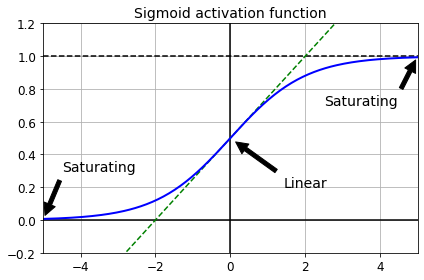

In [4]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


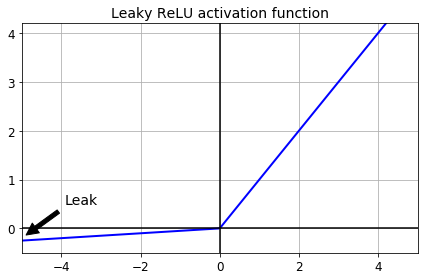

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [9]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 63us/sample - loss: 1.2806 - accuracy: 0.6250 - val_loss: 0.8882 - val_accuracy: 0.7150
Epoch 2/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.7954 - accuracy: 0.7373 - val_loss: 0.7135 - val_accuracy: 0.7648
Epoch 3/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.6816 - accuracy: 0.7726 - val_loss: 0.6355 - val_accuracy: 0.7882
Epoch 4/10
55000/55000 [==============================] - 3s 49us/sample - loss: 0.6215 - accuracy: 0.7935 - val_loss: 0.5922 - val_accuracy: 0.8010
Epoch 5/10
55000/55000 [==============================] - 3s 50us/sample - loss: 0.5830 - accuracy: 0.8081 - val_loss: 0.5596 - val_accuracy: 0.8174
Epoch 6/10
55000/55000 [==============================] - 3s 51us/sample - loss: 0.5553 - accuracy: 0.8155 - val_loss: 0.5338 - val_accuracy: 0.8238
Epoch 7/10
55000/55000 [==============================] -

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 66us/sample - loss: 1.3470 - accuracy: 0.6225 - val_loss: 0.9268 - val_accuracy: 0.7200
Epoch 2/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.8208 - accuracy: 0.7357 - val_loss: 0.7322 - val_accuracy: 0.7640
Epoch 3/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.6972 - accuracy: 0.7697 - val_loss: 0.6494 - val_accuracy: 0.7868
Epoch 4/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.6332 - accuracy: 0.7904 - val_loss: 0.6027 - val_accuracy: 0.8024
Epoch 5/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.5918 - accuracy: 0.8051 - val_loss: 0.5674 - val_accuracy: 0.8140
Epoch 6/10
55000/55000 [==============================] - 3s 60us/sample - loss: 0.5619 - accuracy: 0.8140 - val_loss: 0.5393 - val_accuracy: 0.8252
Epoch 7/10
55000/55000 [==============================] -

In [17]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


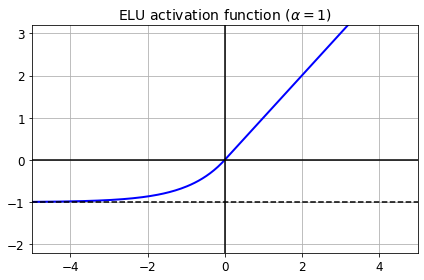

In [18]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [19]:
keras.layers.Dense(10, activation="elu")

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [22]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [23]:
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.8288 - accuracy: 0.7235 - val_loss: 0.5511 - val_accuracy: 0.8152
Epoch 2/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.5682 - accuracy: 0.8041 - val_loss: 0.4789 - val_accuracy: 0.8382
Epoch 3/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.5107 - accuracy: 0.8220 - val_loss: 0.4446 - val_accuracy: 0.8478
Epoch 4/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.4807 - accuracy: 0.8323 - val_loss: 0.4215 - val_accuracy: 0.8554
Epoch 5/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4545 - accuracy: 0.8419 - val_loss: 0.4038 - val_accuracy: 0.8594
Epoch 6/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.4402 - accuracy: 0.8457 - val_loss: 0.3926 - val_accuracy: 0.8640
Epoch 7/10
55000/55000 [==============================] 

In [26]:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 108us/sample - loss: 1.0366 - accuracy: 0.6733 - val_loss: 0.6666 - val_accuracy: 0.7924
Epoch 2/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.6749 - accuracy: 0.7825 - val_loss: 0.5544 - val_accuracy: 0.8188
Epoch 3/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.5936 - accuracy: 0.8038 - val_loss: 0.4985 - val_accuracy: 0.8364
Epoch 4/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.5487 - accuracy: 0.8157 - val_loss: 0.4660 - val_accuracy: 0.8436
Epoch 5/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.5150 - accuracy: 0.8263 - val_loss: 0.4403 - val_accuracy: 0.8496
Epoch 6/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4913 - accuracy: 0.8334 - val_loss: 0.4246 - val_accuracy: 0.8540
Epoch 7/10
55000/55000 [==============================] 

In [29]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [30]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [31]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

In [32]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [33]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [37]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [38]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]), 
                                 keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
                                 keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
                                 keras.layers.Dense(10, activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [39]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.4897 - accuracy: 0.8274 - val_loss: 0.4062 - val_accuracy: 0.8616
Epoch 2/25
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3818 - accuracy: 0.8649 - val_loss: 0.3888 - val_accuracy: 0.8634
Epoch 3/25
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3488 - accuracy: 0.8745 - val_loss: 0.3646 - val_accuracy: 0.8698
Epoch 4/25
55000/55000 [==============================] - 3s 62us/sample - loss: 0.3275 - accuracy: 0.8832 - val_loss: 0.3521 - val_accuracy: 0.8770
Epoch 5/25
55000/55000 [==============================] - 3s 60us/sample - loss: 0.3123 - accuracy: 0.8889 - val_loss: 0.3452 - val_accuracy: 0.8776
Epoch 6/25
55000/55000 [==============================] - 3s 59us/sample - loss: 0.2994 - accuracy: 0.8936 - val_loss: 0.3426 - val_accuracy: 0.8790
Epoch 7/25
55000/55000 [==============================] -

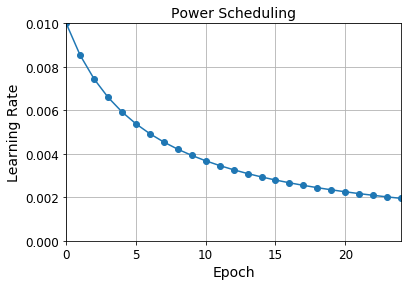

In [40]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32 #batch 지정않할 경우 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [43]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch/20)

In [53]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

In [56]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [59]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 7s 129us/sample - loss: 0.9736 - accuracy: 0.7212 - val_loss: 0.9069 - val_accuracy: 0.6980
Epoch 2/25
55000/55000 [==============================] - 6s 113us/sample - loss: 0.8671 - accuracy: 0.7169 - val_loss: 1.2410 - val_accuracy: 0.6156
Epoch 3/25
55000/55000 [==============================] - 6s 112us/sample - loss: 0.7602 - accuracy: 0.7382 - val_loss: 0.8299 - val_accuracy: 0.7036
Epoch 4/25
55000/55000 [==============================] - 6s 111us/sample - loss: 0.6470 - accuracy: 0.8084 - val_loss: 0.5678 - val_accuracy: 0.8364
Epoch 5/25
55000/55000 [==============================] - 6s 112us/sample - loss: 0.5473 - accuracy: 0.8396 - val_loss: 0.5470 - val_accuracy: 0.8330
Epoch 6/25
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4645 - accuracy: 0.8578 - val_loss: 0.5538 - val_accuracy: 0.8570
Epoch 7/25
55000/55000 [===========================

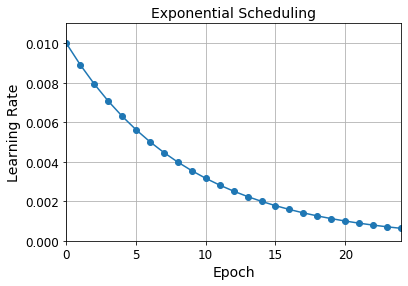

In [60]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [61]:
def piecewise_constant_fn(epoch):
    if epoch <5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [62]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [63]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 7s 122us/sample - loss: 0.8901 - accuracy: 0.7474 - val_loss: 0.7677 - val_accuracy: 0.7678
Epoch 2/25
55000/55000 [==============================] - 6s 104us/sample - loss: 0.8790 - accuracy: 0.7194 - val_loss: 1.3622 - val_accuracy: 0.6416
Epoch 3/25
55000/55000 [==============================] - 6s 104us/sample - loss: 0.9172 - accuracy: 0.7012 - val_loss: 0.9418 - val_accuracy: 0.7126
Epoch 4/25
55000/55000 [==============================] - 6s 102us/sample - loss: 1.0335 - accuracy: 0.6607 - val_loss: 1.1585 - val_accuracy: 0.6716
Epoch 5/25
55000/55000 [==============================] - 6s 103us/sample - loss: 1.0441 - accuracy: 0.6396 - val_loss: 1.0083 - val_accuracy: 0.6488
Epoch 6/25
55000/55000 [==============================] - 6s 102us/sample - loss: 0.7249 - accuracy: 0.7216 - val_loss: 0.7184 - val_accuracy: 0.7494
Epoch 7/25
55000/55000 [===========================

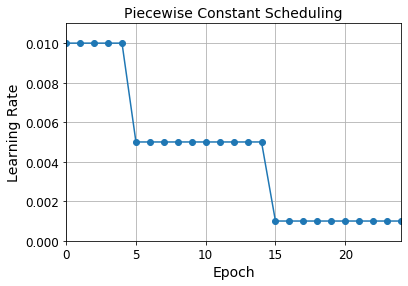

In [64]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [65]:
tf.random.set_seed(42)
np.random.seed(42)

In [66]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum = 0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 75us/sample - loss: 0.6133 - accuracy: 0.8024 - val_loss: 0.5579 - val_accuracy: 0.8070
Epoch 2/25
55000/55000 [==============================] - 4s 66us/sample - loss: 0.5118 - accuracy: 0.8371 - val_loss: 0.5801 - val_accuracy: 0.8222
Epoch 3/25
55000/55000 [==============================] - 4s 67us/sample - loss: 0.5257 - accuracy: 0.8404 - val_loss: 0.5654 - val_accuracy: 0.8342
Epoch 4/25
55000/55000 [==============================] - 4s 64us/sample - loss: 0.5069 - accuracy: 0.8461 - val_loss: 0.4997 - val_accuracy: 0.8460
Epoch 5/25
55000/55000 [==============================] - 3s 64us/sample - loss: 0.5425 - accuracy: 0.8471 - val_loss: 0.5556 - val_accuracy: 0.8474
Epoch 6/25
55000/55000 [==============================] - 4s 65us/sample - loss: 0.5053 - accuracy: 0.8558 - val_loss: 0.4866 - val_accuracy: 0.8534
Epoch 7/25
55000/55000 [==============================] -

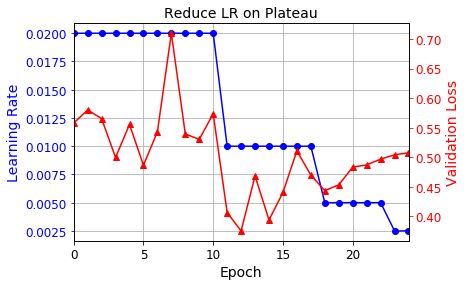

In [67]:

plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [68]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

kernel_regularizer=keras.regularizers.l1(0.01)
kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)

In [70]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 7s 127us/sample - loss: 1.5895 - accuracy: 0.8103 - val_loss: 0.7553 - val_accuracy: 0.8096
Epoch 2/2
55000/55000 [==============================] - 6s 102us/sample - loss: 0.7184 - accuracy: 0.8264 - val_loss: 0.7178 - val_accuracy: 0.8222


In [71]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                RegularizedDense(300),
                                RegularizedDense(100),
                                RegularizedDense(10, activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 7s 127us/sample - loss: 1.6418 - accuracy: 0.8107 - val_loss: 0.7600 - val_accuracy: 0.8068
Epoch 2/2
55000/55000 [==============================] - 6s 118us/sample - loss: 0.7197 - accuracy: 0.8262 - val_loss: 0.7175 - val_accuracy: 0.8254


In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 7s 130us/sample - loss: 0.5765 - accuracy: 0.8004 - val_loss: 0.3741 - val_accuracy: 0.8642
Epoch 2/2
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4244 - accuracy: 0.8443 - val_loss: 0.3658 - val_accuracy: 0.8606


In [74]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",kernel_constraint=keras.constraints.max_norm(1.))

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 8s 145us/sample - loss: 0.4749 - accuracy: 0.8336 - val_loss: 0.3857 - val_accuracy: 0.8640
Epoch 2/2
55000/55000 [==============================] - 7s 133us/sample - loss: 0.3575 - accuracy: 0.8694 - val_loss: 0.3747 - val_accuracy: 0.8666
